In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load dataset

In [4]:
df = pd.read_csv('/content/data_preprocessed.csv')


In [5]:
df

,title,genres,certificate,release_date,countries_of_origin,languages,gross_worldwide,budget,runtime,color,aspect_ratio,score,votes,user_reviews,critic_reviews,metascore
0,Bóng Ma,"Action,Adventure,Thriller,",NaN,2015.0,"United Kingdom,United States,Austria,Mexico,It...","English,Spanish,Italian,German,French,",8.806815e+08,245000000.0,148.0,Color,2.39 : 1,6.8,408.000,1200.0,462.0,60.0
1,Halloween,"Crime,Horror,Thriller,",C18,2018.0,"United States,United Kingdom,","English,",2.556149e+08,10000000.0,106.0,Color,2.39 : 1,6.5,133.000,1900.0,499.0,67.0
2,Venom,"Action,Adventure,Sci-Fi,",NaN,2018.0,"China,United States,","English,Mandarin,Malay,",8.560852e+08,100000000.0,112.0,Color,2.39 : 1,6.7,415.000,3800.0,427.0,35.0
3,Skyfall,"Action,Adventure,Thriller,",C13,2012.0,"United Kingdom,United States,Turkey,","English,Turkish,Shanghainese,Portuguese,Japanese,",1.108569e+09,200000000.0,143.0,Color,2.39 : 1,7.8,659.000,1600.0,542.0,81.0
4,The Night House,"Horror,Mystery,Thriller,",C16,2021.0,"United Kingdom,United States,","English,",1.516366e+07,NaN,107.0,Color,2.35 : 1,6.5,15.000,262.0,133.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17336,Meteler,"Action,War,",C13,2019.0,"Turkey,","Turkish,",3.308800e+04,NaN,95.0,Color,NaN,4.3,0.122,1.0,0.0,NaN
17337,Haganenet,"Drama,",Unrated,2014.0,"Israel,France,","Hebrew,",2.840650e+05,NaN,119.0,NaN,1.85 : 1,6.6,1.200,8.0,46.0,68.0
17338,Linh Hồn Tạm Trú,"Drama,Fantasy,Thriller,",NaN,2019.0,"Thailand,","Thai,",4.870100e+04,NaN,132.0,Color,2.35 : 1,7.3,1.400,11.0,2.0,NaN
17339,Como la espuma,"Comedy,Drama,Romance,",C18,2017.0,"Spain,","Spanish,",1.889200e+04,580000.0,93.0,Color,2.35 : 1,4.8,0.363,3.0,7.0,NaN


#Prepare and clean data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17341 entries, 0 to 17340
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                17341 non-null  object 
 1   genres               15573 non-null  object 
 2   certificate          6637 non-null   object 
 3   release_date         17262 non-null  float64
 4   countries_of_origin  16169 non-null  object 
 5   languages            16008 non-null  object 
 6   gross_worldwide      17341 non-null  float64
 7   budget               4792 non-null   float64
 8   runtime              15112 non-null  float64
 9   color                15453 non-null  object 
 10  aspect_ratio         8644 non-null   object 
 11  score                15398 non-null  float64
 12  votes                17340 non-null  float64
 13  user_reviews         17340 non-null  float64
 14  critic_reviews       17340 non-null  float64
 15  metascore            3996 non-null  

In [7]:
df.describe()

,release_date,gross_worldwide,budget,runtime,score,votes,user_reviews,critic_reviews,metascore
count,17262.000000,1.734100e+04,4.792000e+03,15112.000000,15398.000000,17340.000000,17340.000000,17340.000000,3996.000000
mean,2015.386456,1.714839e+07,1.825451e+07,103.068952,5.908982,15.769743,67.151903,38.314821,56.548549
std,3.034637,9.153320e+07,3.814428e+07,20.369407,1.152830,73.173130,295.047008,90.994578,17.179328
min,2010.000000,2.000000e+00,2.591644e-03,45.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2013.000000,3.235200e+04,1.131400e+06,90.000000,5.300000,0.065000,1.000000,0.000000,44.000000
50%,2016.000000,3.214230e+05,4.176000e+06,100.000000,6.100000,0.400000,3.000000,4.000000,57.000000
75%,2018.000000,2.791208e+06,1.500000e+07,112.000000,6.700000,3.300000,25.000000,28.000000,69.000000
max,2021.000000,2.797501e+09,3.560000e+08,808.000000,9.400000,2200.000000,11100.000000,1000.000000,100.000000


In [8]:
df.isnull().sum()

title                      0
genres                  1768
certificate            10704
release_date              79
countries_of_origin     1172
languages               1333
gross_worldwide            0
budget                 12549
runtime                 2229
color                   1888
aspect_ratio            8697
score                   1943
votes                      1
user_reviews               1
critic_reviews             1
metascore              13345
dtype: int64

- Feature certificate - budget có số lượng missing value > 50%
- Feature gross_worldwide là output nên khi preprocessing đã được xử lí để drop hết missing value
- Feature votes - user_reviews - critic_reviews các missing value đã được điền khuyết với giá trị 0 (tương ứng với không có vote hoặc review)

#Basic EDA & Visualization

##Gernes

In [9]:
df.groupby("genres")['genres'].count()

genres
Action,                                                  118
Action,Adventure,                                         13
Action,Adventure,Biography,Comedy,Crime,Drama,Horror,      1
Action,Adventure,Biography,Drama,                          1
Action,Adventure,Biography,Drama,History,                  1
                                                        ... 
Sport,                                                    10
Thriller,                                                193
Thriller,Western,                                          2
War,                                                      10
Western,                                                   1
Name: genres, Length: 1308, dtype: int64

Có 1552 thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên ta chỉ xét 50 thể loại có số phim lớn nhất.

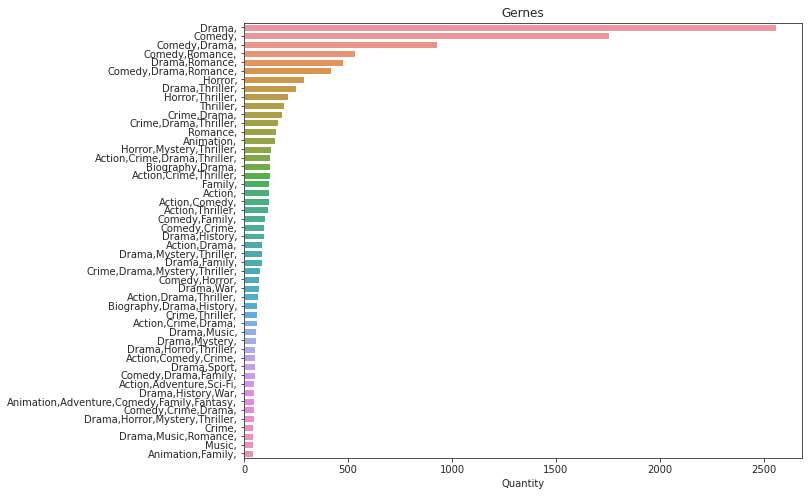

In [53]:
y = df.groupby("genres")['genres'].count().nlargest(50)
x = y.index 
 
plt.figure(figsize=(10,8))
ax = sns.barplot(x= y, y = x)
ax.set(title = 'Gernes')
ax.set(xlabel = 'Quantity') 
ax.set(ylabel = '') 

plt.show()

- Thể loại drama/comedy là thể loại được sản xuất chủ yếu trong dataset (vị trí thứ 1 và 2)
- Phim với thể loại drama kết hợp comedy theo sau ở vị trí thứ 3.

=> Thể loại drama/comedy khá được ưu ái bởi các nhà sản xuất phim.

<?> Liệu khán giả có đón nhận những thể loại phim như thế này không? (Tính tổng doanh thu)


In [11]:
drama = comedy = dracome = 0
for i in range(len(df)):
  if df['genres'][i] == 'Drama,': drama += df['gross_worldwide'][i]
  if df['genres'][i] == 'Comedy,': comedy += df['gross_worldwide'][i]
  if df['genres'][i] == 'Drama, Comedy': dracome += df['gross_worldwide'][i]

genres_gross = [drama, comedy, dracome]
genres_gross

[4743051944.0, 9975859423.0, 0]

##Certificate

In [12]:
cert_size = df.groupby(['certificate'], dropna=False, as_index=False).size()
cert_size

,certificate,size
0,C13,2094
1,C16,1480
2,C18,470
3,P,654
4,Unrated,1939
5,NaN,10704


In [13]:
print(cert_size['certificate'])

0        C13
1        C16
2        C18
3          P
4    Unrated
5        NaN
Name: certificate, dtype: object


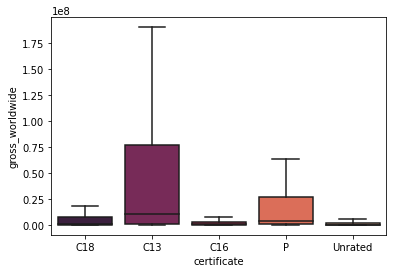

In [14]:
sns.boxplot(x=df['certificate'], y=df['gross_worldwide'], data=df, showfliers = False, palette='rocket')

- Phim với cert là C13 cho phân bố doanh thu lớn trong bộ dữ liệu.
- Trong khi đó phim với cert là P lại có phân bố doanh thu thấp hơn so với C13. 

=> Vấn đề ở đây là cert P là dành cho mọi lứa tuổi trong khi cert C13 là độ tuổi từ từ 13 trở lên. 

<?> Có thể bộ dữ liệu bị lệch?

##Release date

In [15]:
df_sorted=df.sort_values(by="release_date")
df_sorted

,title,genres,certificate,release_date,countries_of_origin,languages,gross_worldwide,budget,runtime,color,aspect_ratio,score,votes,user_reviews,critic_reviews,metascore
9629,Yat lo yau lei,"Drama,",NaN,2010.0,"Hong Kong,China,","Mandarin,Cantonese,",1109120.0,NaN,108.0,Color,2.35 : 1,6.4,0.114,4.0,0.0,NaN
7304,Boðberi,"Drama,Mystery,Thriller,",NaN,2010.0,"Iceland,","Icelandic,",19037.0,NaN,96.0,Color,2.35 : 1,4.6,0.127,1.0,1.0,NaN
4780,Magika,"Musical,",NaN,2010.0,"Malaysia,","Malay,",1095239.0,NaN,94.0,Color,NaN,6.1,0.115,2.0,2.0,NaN
15743,Ahswiram,NaN,NaN,2010.0,NaN,NaN,10579.0,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,NaN
9688,Tag und Nacht,"Drama,",Unrated,2010.0,"Austria,","German,",125917.0,NaN,101.0,Color,1.85 : 1,5.5,0.411,5.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,Gutsy Girls Adventure Film Tour,NaN,NaN,NaN,NaN,NaN,66528.0,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,NaN
15747,Pet Departures,"Romance,",NaN,NaN,"China,","Chinese,",11958.0,NaN,106.0,Color,NaN,NaN,0.000,0.0,0.0,NaN
15797,The Garden of Numbers,"Family,Fantasy,Sci-Fi,",NaN,NaN,"Italy,","Italian,",28250.0,NaN,72.0,Color,NaN,NaN,0.000,0.0,0.0,NaN
15963,Crazy Arts,"Comedy,Drama,Family,",NaN,NaN,"China,","Chinese,",50995.0,NaN,107.0,Color,NaN,NaN,0.000,0.0,0.0,NaN


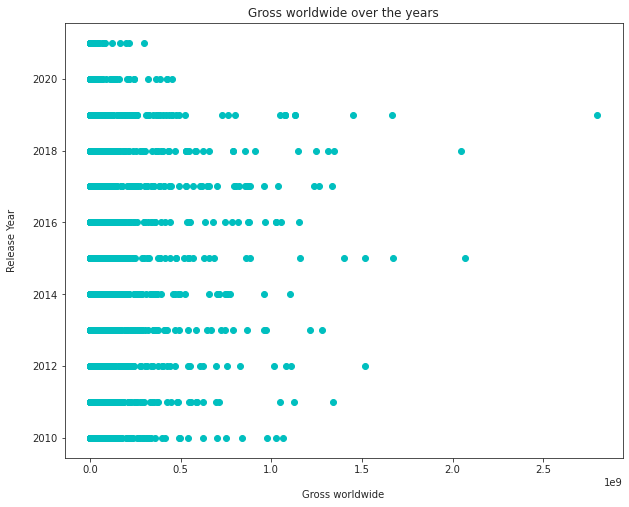

In [36]:
year = df_sorted['release_date']
gross = df_sorted['gross_worldwide']

plt.figure(figsize=(10, 8))
plt.scatter(gross,year,c='c')
plt.xlabel("Gross worldwide", labelpad=15)
plt.ylabel("Release Year", labelpad=15)
plt.title("Gross worldwide over the years");

##Languages

In [17]:
df.groupby("languages")['languages'].count()

languages
Aboriginal,                   1
Aboriginal,English,           1
Afrikaans,                   35
Afrikaans,English,           31
Afrikaans,English,Dutch,      1
                             ..
Yoruba,English,Ibo,Hausa,     1
Zulu,                         3
Zulu,English,                 3
Zulu,English,Afrikaans,       1
Zulu,Xhosa,Sotho,English,     1
Name: languages, Length: 1665, dtype: int64

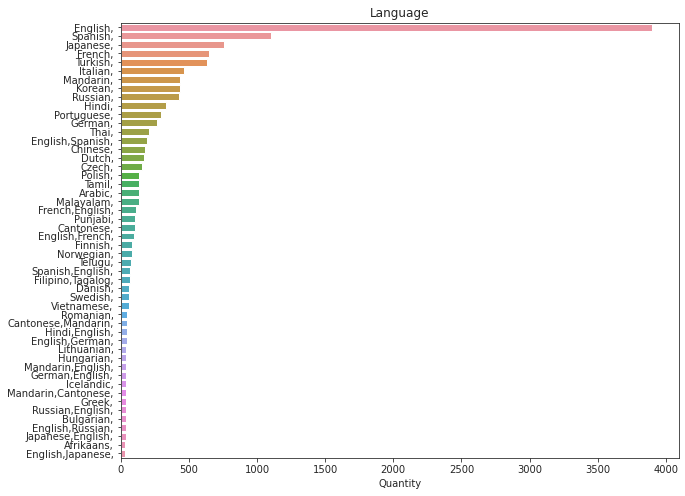

In [35]:
y = df.groupby("languages")['languages'].count().nlargest(50)
x = y.index 
 
plt.figure(figsize=(10,8))
ax = sns.barplot(x= y, y = x)
ax.set(title = 'Language')
ax.set(xlabel = 'Quantity') 
ax.set(ylabel = '') 

plt.show()

Hầu hết các phim khi ra rạp đều có ngôn ngữ là tiếng Anh

##Meta score

In [19]:
ms_sorted=df.sort_values(by="metascore")
ms_sorted

,title,genres,certificate,release_date,countries_of_origin,languages,gross_worldwide,budget,runtime,color,aspect_ratio,score,votes,user_reviews,critic_reviews,metascore
11179,InAPPropriate Comedy,"Comedy,",NaN,2014.0,"United States,","English,",228004.0,NaN,83.0,Color,NaN,2.8,4.500,54.0,23.0,1.0
13683,United Passions,"Drama,History,Sport,",P,2014.0,"France,","English,",171511.0,25000000.0,110.0,Color,2.35 : 1,2.1,4.200,33.0,12.0,1.0
11958,Not Cool,"Comedy,Drama,Romance,",Unrated,2014.0,"United States,","English,",36026.0,800000.0,93.0,Color,NaN,3.9,5.700,88.0,7.0,1.0
12331,Contract to Kill,"Action,Thriller,",C16,2016.0,"United States,Monaco,","English,",7048.0,5000000.0,90.0,Color,NaN,3.3,1.700,40.0,22.0,3.0
15827,Black Rose,"Action,Crime,Drama,",C18,2014.0,"Russia,United States,","English,Russian,",863808.0,7000000.0,83.0,Color,1.85 : 1,2.6,2.500,13.0,43.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17335,War of the Dead,"Action,Adventure,Horror,Sci-Fi,Thriller,",Unrated,2012.0,"United States,Lithuania,Italy,","English,",58285.0,1160000.0,86.0,Color,2.35 : 1,4.1,2.600,28.0,45.0,NaN
17336,Meteler,"Action,War,",C13,2019.0,"Turkey,","Turkish,",33088.0,NaN,95.0,Color,NaN,4.3,0.122,1.0,0.0,NaN
17338,Linh Hồn Tạm Trú,"Drama,Fantasy,Thriller,",NaN,2019.0,"Thailand,","Thai,",48701.0,NaN,132.0,Color,2.35 : 1,7.3,1.400,11.0,2.0,NaN
17339,Como la espuma,"Comedy,Drama,Romance,",C18,2017.0,"Spain,","Spanish,",18892.0,580000.0,93.0,Color,2.35 : 1,4.8,0.363,3.0,7.0,NaN


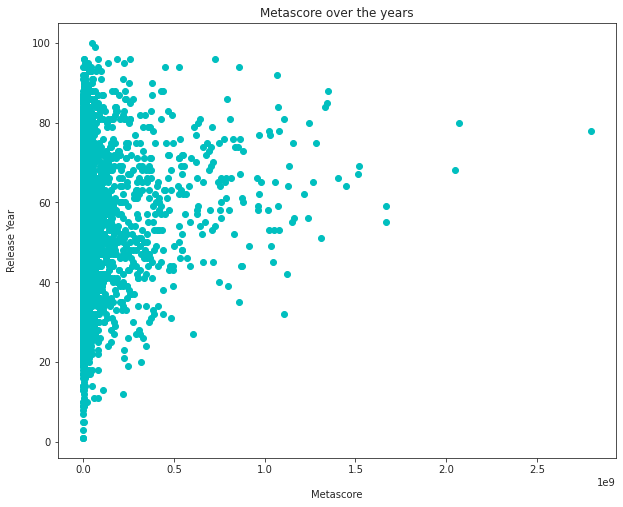

In [38]:
ms = df_sorted['metascore']
gross = df_sorted['gross_worldwide']

plt.figure(figsize=(10, 8))
plt.scatter(gross,ms,c='c')
plt.xlabel("Metascore", labelpad=15)
plt.ylabel("Release Year", labelpad=15)
plt.title("Metascore over the years");

##Runtime

In [39]:
print(df['runtime'].max())
print(df['runtime'].min())
print(df['runtime'].mean())
print(df['runtime'].median())

808.0
45.0
103.06895182636316
100.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


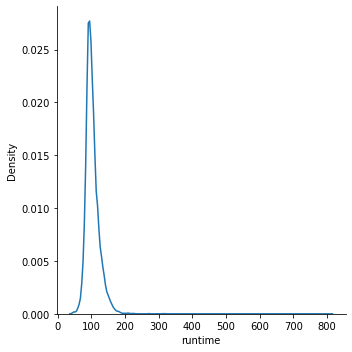

In [24]:
sns.displot(x=df['runtime'], kind="kde", label='Distribution of movie runtime', ax='Runtime')

Biểu đồ chỉ ra thời lượng phim trung bình là 103 phút, trung vị là 100 phút. 
- 50% phim có thời lượng ngắn hơn 100, khoảng 45% trong khoảng 100 đến 200 phút. 
- Có một số phim là outlier với thời gian lớn hơn 200p (lớn nhất là 808 phút).

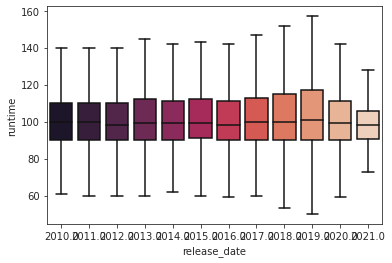

In [32]:
sns.boxplot(y=df['runtime'], x=df['release_date'], data=df, showfliers = False, palette='rocket')

Thời lượng phim trong 10 năm không có quá nhiều sự thay đổi, tuy nhiên vào năm 2019 thì phim có thời lượng cao hơn tương đối so với những năm còn lại.

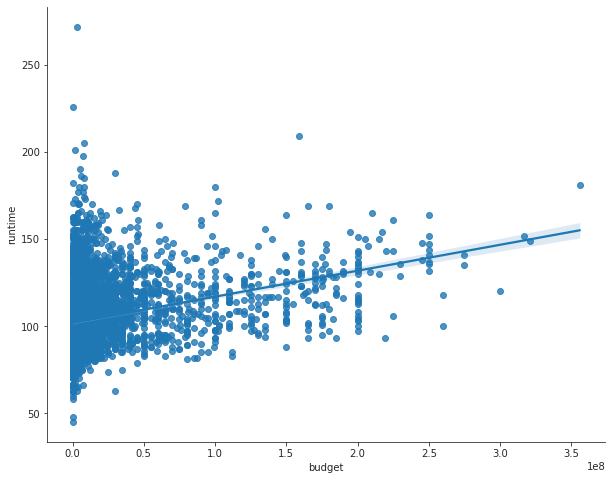

In [33]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(y="runtime", x="budget", data=df, ax=ax)
sns.despine()

Thời lượng phim có quan hệ với chi phí đầu tư vào phim khi ta thấy rằng:
- Phim với sự đầu tư càng lớn thì thời lượng càng cao: Đòi hỏi chi phí cho các phân cảnh quay, hậu kì nhiều hơn.
- Phương sai (runtime) của phim với chi phí thấp thì cao và giảm dần khi chi phí tăng.

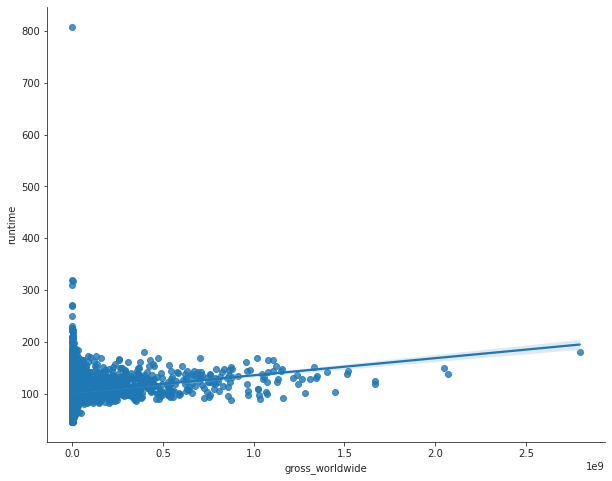

In [34]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(y="runtime", x="gross_worldwide", data=df, ax=ax)
sns.despine()

##Budget

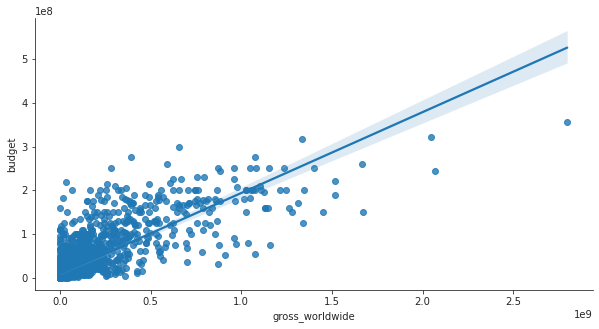

In [45]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x="gross_worldwide", y="budget", data=df, ax=ax)
sns.despine()

Đồ thi cho thấy tương quan giữa budget và gross_worldwide là lớn. Ta đi tính correlation giữa 2 thuộc tính.

In [47]:
df.corr()['gross_worldwide']

release_date      -0.020751
gross_worldwide    1.000000
budget             0.809323
runtime            0.158454
score              0.145893
votes              0.732181
user_reviews       0.634410
critic_reviews     0.616756
metascore          0.076227
Name: gross_worldwide, dtype: float64

Kết quả trả về là 0.809323. Đây là mức tương quan mạnh đúng như dự đoán.

#Data driven

##1. Thể loại phim nào nhận được sự đánh giá cao từ khán giả?
Ở phần EDA cơ bản ta đã chỉ ra rằng có 1552 thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên để rút ngắn công việc, ta chỉ xét đến những thể loại với số lượng phim trên 200 phim.

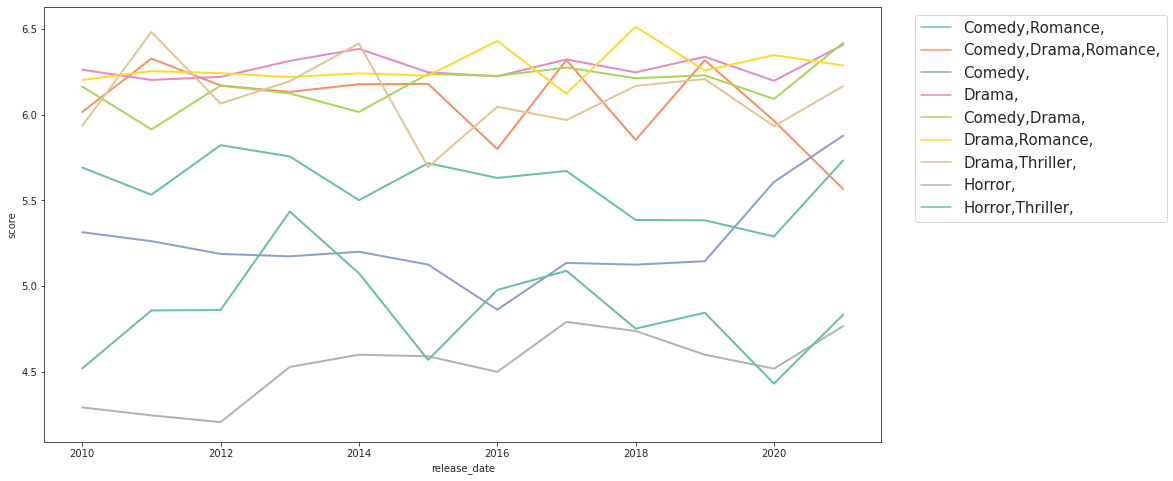

In [60]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>200).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['score'], hue=genre_filter["genres"], ci=None,linewidth = 2, palette="Set2")
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

Top những thể loại phim được đánh giá cao từ khán giả là Drama,Romance - Drama,Thriller - Drama - Comedy,Drama

##2. Có thể loại phim nào nhận score thấp nhưng có gross_worldwide cao không?

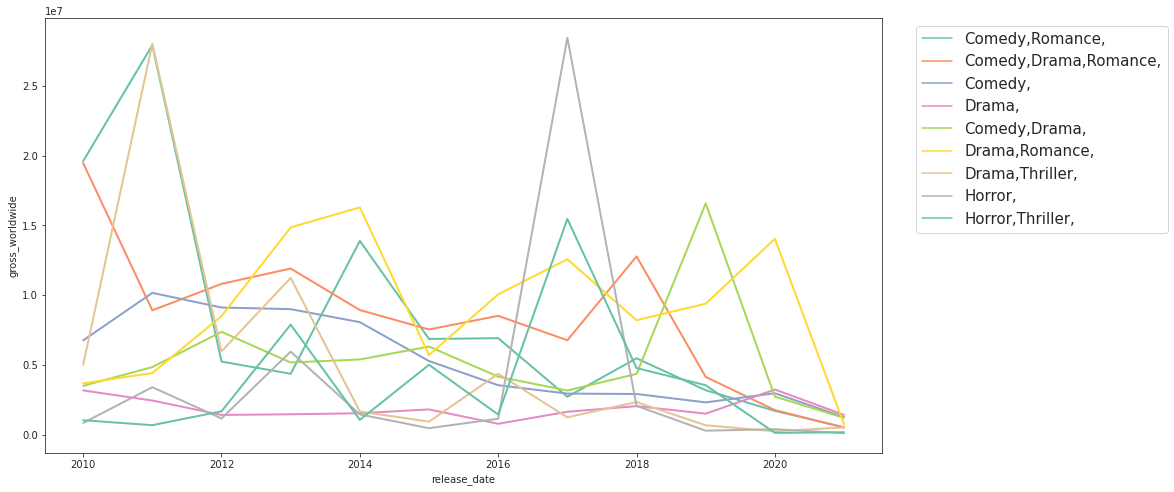

In [70]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>200).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['gross_worldwide'], hue=genre_filter["genres"], ci=None,linewidth = 2, palette="Set2")
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

##3. Ảnh hưởng của ngôn ngữ tới doanh thu phim là như thế nào?
- Hầu hết phim ra rạp đều có ngôn ngữ là tiếng Anh nên doanh thu của những phim tiếng Anh sẽ là lớn nhất.
- Vậy bên cạnh tiếng Anh liệu có ngôn ngữ phim nào được đón nhận hay không?

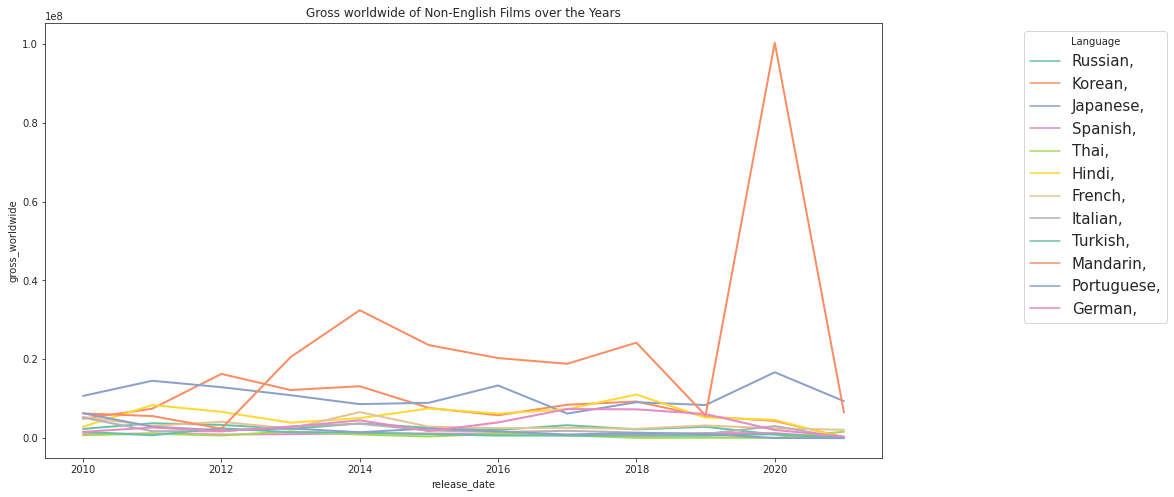

In [71]:
non_eng_movies=df[df["languages"].str.contains("English")==False]
non_eng=non_eng_movies.groupby('languages').filter(lambda x : len(x)>200).sort_values(by="release_date")

non_eng_graph=sns.lineplot(data=non_eng, x=non_eng["release_date"], y=non_eng['gross_worldwide'], hue=non_eng["languages"], ci=None,linewidth = 2, palette="Set2")
non_eng_graph.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15}, title="Language")
non_eng_graph.set(title="Gross worldwide of Non-English Films over the Years")

fig = plt.gcf()
fig.set_size_inches(15, 8)

- Phim có ngôn ngữ là tiếng Hàn có doanh thu vượt trội so với những ngôn ngữ có 200 phim trở lên trong dataset. Lí giải cho điều này bởi văn hoá Hàn Quốc, những kdrama film rất được ưa chuộng và lên ngôi trong suốt thập kỉ vừa qua.
- Phim có ngôn ngữ là tiếng Nhật có doanh thu cũng vượt trội theo sau. Lí giải cho điều nay có thể là do sự phát triển lớn mạnh của phim hoạt hình Nhật Bản (gần như bành trướng trong dòng phim hoạt hình).